## Import the relevant Modules

In [54]:
import pandas as pd
import numpy as np
from datetime import datetime
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

## Global Constants

In [55]:
DATA_FILE = '/home/ubuntu/Sharmo_Notebooks/Klyvio/data.csv'
DATE_FORMAT_24_HOURS = '%Y-%m-%d %H:%M:%S'
DATE_FORMAT_12_HOURS = '%Y-%m-%d %I:%M:%S %p'

## Read the Input Data File

In [56]:
datetime_parser = lambda x: pd.datetime.strptime(x, DATE_FORMAT_24_HOURS)
df = pd.read_csv(DATA_FILE, parse_dates=['date'], date_parser=datetime_parser)

# Solution to Problem A

In [74]:
def convert_to_12_hours_datetime_format(x):
     return datetime.strftime(x, DATE_FORMAT_12_HOURS)
    
grouped = df.groupby(by=['customer_id', 'gender'], as_index=False)
qs_a = grouped.agg({"date": "max", "value": "size"})
qs_a.rename({"date": "most_recent_order_date", "value": "order_count"}, axis=1, inplace=True)
qs_a['most_recent_order_date'] = qs_a['most_recent_order_date'].apply(convert_to_12_hours_datetime_format)
# print out the result
qs_a.sort_values(by='customer_id', ascending=True).head(n=10)

,customer_id,gender,most_recent_order_date,order_count
0,1000,0,2017-01-01 12:11:31 AM,1
1,1001,0,2017-01-01 12:29:56 AM,1
2,1002,1,2017-02-19 09:35:31 PM,3
3,1003,1,2017-04-26 02:37:20 AM,4
4,1004,0,2017-01-01 03:11:54 AM,1
5,1005,1,2017-12-16 01:39:27 AM,2
6,1006,1,2017-05-09 03:27:20 PM,3
7,1007,0,2017-01-01 03:59:50 PM,1
8,1008,0,2017-12-17 05:47:48 AM,3
9,1009,1,2017-01-01 07:27:17 PM,1


# Solution to Problem B

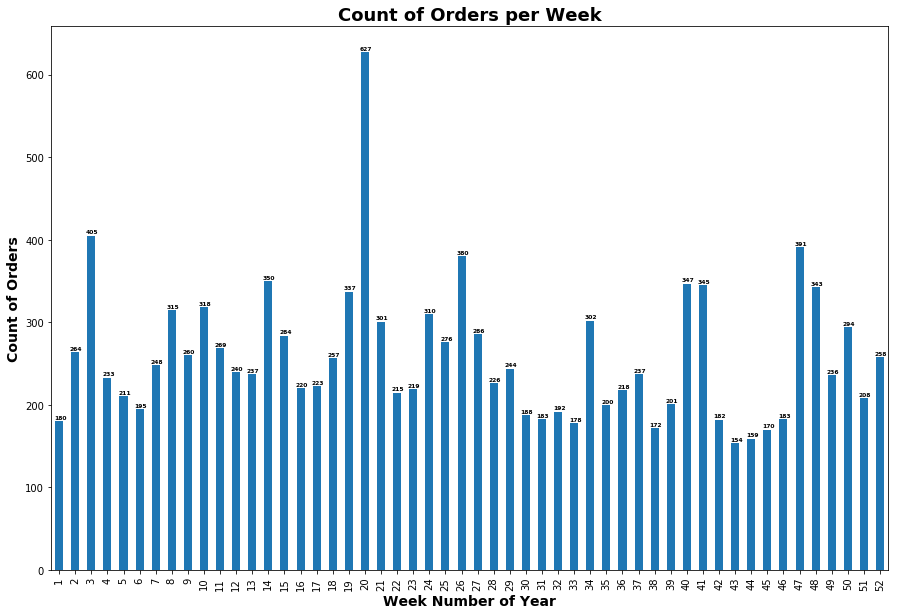

In [58]:
df["week_number_of_year"] = df["date"].dt.week
grouped = df.groupby(by=['week_number_of_year'], as_index=False)
qs_b = grouped.agg({"date": "size"})
qs_b.rename({'date': 'count_of_orders'}, axis=1, inplace=True)
ax = qs_b.plot.bar(x='week_number_of_year', y='count_of_orders', legend=False, figsize=(15, 10))
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() - 0.08, p.get_height() + 2.5), fontsize=6, fontweight='bold')
ax.set_xlabel("Week Number of Year", fontweight='bold', fontsize=14)
ax.set_ylabel("Count of Orders", fontweight='bold', fontsize=14)
ax.set_title('Count of Orders per Week', fontweight='bold', fontsize=18)
plt.show()

# Solution to Problem C

In [59]:
# segregating customers with gender 0 and gender 1
order_gen_0 = df[df['gender'] == 0]['value']
order_gen_1 = df[df['gender'] == 1]['value']

In [60]:
# calculating the means order values of Customers with Gender 0 and Customers with Gender 1
print ("Mean Order Values of Gender 0 = ", round(order_gen_0.mean(), 2))
print ("Mean Order Values of Gender 1 = ", round(order_gen_1.mean(), 2))

Mean Order Values of Gender 0 =  363.89
Mean Order Values of Gender 1 =  350.71


In order to test for Significance of Difference between the two means, the first thing that I try is: <br>
### 2-sample t-Test
The __Null Hypothesis__: The Means are equal <br><br>
The __Assumptions__:
- The Variances of the two populations are equal
- The samples are independently and randomly drawn
- The distribution of the residuals between the two groups should follow the normal distribution

#### Checking for Assumption Validations to see if the 2-sample t-Test results can be trusted
 1.  __Homogeneity of variances__: For this , we use the __Lavene's Test__ (__Null Hypothesis__: All input samples are from populations with equal variances)


In [61]:
stats.levene(order_gen_0, order_gen_1)

LeveneResult(statistic=5.523015358033226, pvalue=0.018782230716425024)

Since the p-value is below the standard 5% (0.05) mark, this leads us to conclude that there is evidence against the null hypothesis. Hence, there is no homogeneity of variances amongst the two input samples. Hence, we __cannot use__ the 2-Sample t-Test directly. Hence we move on to the next option in these kinds of situations:
### Welch's t-test
This test is commonly used when there is violation in the assumption of equality of variances
<br><br>The __Null Hypothesis__: The Means are equal <br><br>
The __Assumptions__:
- The samples are independently and randomly drawn
- The distribution of the residuals between the two groups should follow the normal distribution

#### Checking for Assumption Validations to see if the 2-sample t-Test results can be trusted
1.  I happened to assume that the samples are randomly drawn and as per my understanding of the dataset, the order values are independent. 
  <br> Hence, it would be safe to conclude that this assumption is met

2. For the normality test, I would plot a p-p graph and use the Shapiro-Wilk test for both the samples:

Text(0.5, 1.0, 'Orders of Gender 0 P-P Plot')

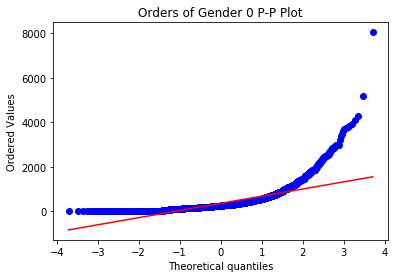

In [62]:
##  Testing for Gender 0
stats.probplot(order_gen_0, plot=plt)
plt.title('Orders of Gender 0 P-P Plot')

In [63]:
## Shapiro-Wilk test for Gender 0 samples
w_shapiro_0, p_value_shapiro_0 = stats.shapiro(order_gen_0)
print('W for Gender 0 Samples is ', w_shapiro_0)
print('P-value for Gender 0 Samples is ', p_value_shapiro_0)

W for Gender 0 Samples is  0.6567721366882324
P-value for Gender 0 Samples is  0.0


#### The P-P Plot and the P-Value from Shapiro-Wilk test clearly shows that the Gender 0 samples were not drawn froma Normal Distribution <br>

Text(0.5, 1.0, 'Orders of Gender 1 P-P Plot')

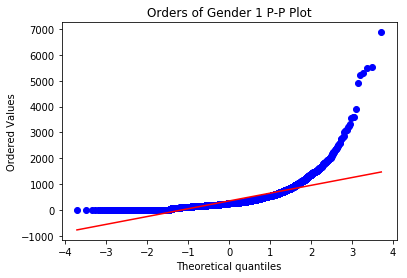

In [64]:
##  Testing for Gender 1
stats.probplot(order_gen_1, plot=plt)
plt.title('Orders of Gender 1 P-P Plot')

In [65]:
## Shapiro-Wilk test for Gender 1 samples
w_shapiro_1, p_value_shapiro_1 = stats.shapiro(order_gen_1)
print('W for Gender 1 Samples is ', w_shapiro_1)
print('P-value for Gender 1 Samples is ', p_value_shapiro_1)

W for Gender 1 Samples is  0.6406265497207642
P-value for Gender 1 Samples is  0.0


#### The P-P Plot and the P-Value from Shapiro-Wilk test clearly shows that the Gender 1 samples were not drawn froma Normal Distribution <br>

Although, the Normality assumption has failed, but in general if the __sample size is large enough (usually more than 50)__, we may ignore this assumption. Here are the 2 sample sizes:

In [66]:
print('Sample Size of Gender 0 Orders', len(order_gen_0))
print('Sample Size of Gender 1 Orders', len(order_gen_1))

Sample Size of Gender 0 Orders 6759
Sample Size of Gender 1 Orders 6712


#### The above sample sizes are large enough to continue with the Welch's t-test

In [67]:
stats.ttest_ind(order_gen_0, order_gen_1, equal_var = False)

Ttest_indResult(statistic=1.976107933576866, pvalue=0.04816296295128402)

### Thus, as the p-value is less than the standard 0.05 mark we could conclude that there is a statistically significant difference between the Mean of Gender 0 and Gender 1 customer order values.
Assuming the Means are the same for the entire population of Gender 0 and Gender 1 Order Values, we would obtain the sample effect, or larger, in 4.8% of studies because of random sampling error.

# Solution to Problem D

In [68]:
cm = confusion_matrix(df['gender'], df['predicted_gender'], labels=[0, 1])
print (cm)

[[3349 3410]
 [1463 5249]]


The above confusion Matrix represents the following:
    - Out of the total 6759 Customers with Actually Gender 0, only 3349 were classified correctly by the model. The rest 3410 were wrongly classified as Gender 1
    - Out of the total 6712 Customers with Actually Gender 1, only 5249 were classified correctly by the model. The rest 1463 were wrongly classified as Gender 0

In [69]:
tn, fp, fn, tp = cm.ravel()

Formally we could say the following if 0 and 1 had some deeper connotation than Genders:

In [70]:
print('True Negative is : ', tn)
print('False Positive is : ', fp)
print('False Negative is : ', fn)
print('True Positive is : ', tp)

True Negative is :  3349
False Positive is :  3410
False Negative is :  1463
True Positive is :  5249


But the above doesn't really make sense as 0 and 1 in this case doesn't relate to any positive or negative cases. It would be safe to assume that predicting Gender 0 is equally important as predicting Gender 1. To explain it more lucidly, the importance of Recall and Precision for both the classes are equally important. 

In [71]:
recall_0 = tn/(tn+fp)
recall_1 = tp/(tp+fn)
print ('Recall for Gender 0 samples is ', recall_0)
print ('Recall for Gender 1 samples is ', recall_1)

Recall for Gender 0 samples is  0.495487498150614
Recall for Gender 1 samples is  0.7820321811680572


This means the model is better at predicting Gender 1 when samples are actually of Gender 1.  

In [72]:
precision_0 = tn/(tn+fn)
precision_1 = tp/(tp+fp)
print ('Precision for Gender 0 samples is ', precision_0)
print ('Precision for Gender 1 samples is ', precision_1)

Precision for Gender 0 samples is  0.6959684123025769
Precision for Gender 1 samples is  0.6061900912345537


This means when the model Predicts a Gender 0, it has a higher chance of being correct than when it Predicts Gender 1

In [73]:
f1_0 = (2*recall_0*precision_0) / (precision_0 + recall_0)
f1_1 = (2*recall_1*precision_1) / (precision_1 + recall_1)
print ('F1 Score for Gender 0 samples is ', f1_0)
print ('F1 Score for Gender 1 samples is ', f1_1)

F1 Score for Gender 0 samples is  0.578860945467116
F1 Score for Gender 1 samples is  0.6829744323726498


Thus, we see from the confusion matrix as well as from the F1 measure that the __model is more biased towards recognizing Gender 1__. 

# Solution to Problem E 

Recently, I used Random Forest Gini Impurity based Feature Ranking Technique. This helped me immensely to quickly present and explain to a client why we were using the indicators (features), that we had derieved or directly available, in a model. Plotting a Feature Ranking graph based on the Information Gain made the presentation go extremely smoothly and the clients (who were mostly from the business side and not deep into Data Science) were able to grasp the concept and meaning quite easily. 